In [1]:
import numpy as np
import matplotlib.pyplot as plt
from fda_align import precise_align, precise_group_align, precise_karcher_mean, center_warping
from utils import *

(100, 500)


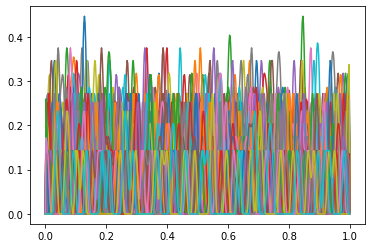

In [2]:
data2=np.load("Etestdata2.npy",allow_pickle=True)[:50,4:]
data1=np.load("Etestdata1.npy",allow_pickle=True)[:50,4:]
data=np.concatenate((data1,data2),axis=0)
print(data.shape)
ls=[]
for i in range(data.shape[0]):
    x1=data[i]
    x1[0]=0
    x1[-1]=0
    t1=np.linspace(0, 1, num=x1.shape[0], endpoint=True)
    plt.plot(t1,x1)
    ls+=[np.stack((x1,t1))]
plt.show()

In [3]:
distmat=np.zeros((data.shape[0],data.shape[0]))


for i in range(0,data.shape[0]):
    f1=ls[i]
    x1=f1[0,:]
    t1=f1[1,:]
    print(i,end="\r")
    for j in range(i+1,data.shape[0]):
        f2=ls[j]
        x2=f2[0,:]
        t2=f2[1,:]
        
        rx1,rx2,g1,g2,t=precise_align(x1,t1,x2,t2)
        
        distmat[i,j]=np.sqrt(((np.diff(rx1)-np.diff(rx2))**2).sum())
        
        distmat[j,i]=distmat[i,j]
  

C:\Users\Emmanuel Hartman\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:691: FutureWarning: 'square_distances' has been introduced in 0.24 to help phase out legacy squaring behavior. The 'legacy' setting will be removed in 1.1 (renaming of 0.26), and the default setting will be changed to True. In 1.3, 'square_distances' will be removed altogether, and distances will be squared by default. Set 'square_distances'=True to silence this warning.
  warnings.warn(


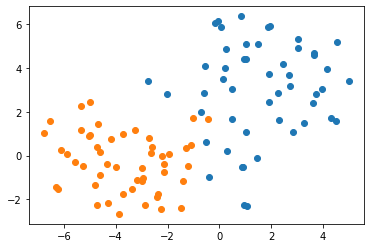

In [4]:
from sklearn.manifold import TSNE,MDS
X_embedded = TSNE(n_components=2, metric='precomputed').fit_transform(distmat)
plt.scatter(X_embedded[:50,0],X_embedded[:50,1])
plt.scatter(X_embedded[50:,0],X_embedded[50:,1])
plt.show()

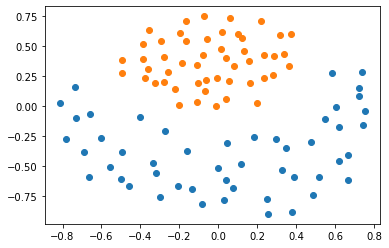

In [5]:
X_embedded = MDS(n_components=2, dissimilarity='precomputed').fit_transform(distmat)
plt.scatter(X_embedded[:50,0],X_embedded[:50,1])
plt.scatter(X_embedded[50:,0],X_embedded[50:,1])
plt.show()